# CAR ACCIDENT SEVERITY PREDICTION

This notebook contains all phases mentioned in CRISP-DM methology.

# 1. Introduction

Traffic accidents are a significant source of deaths, injuries, property damage, and a major concern for public health and traffic safety. Accidents are also a major cause of traffic congestion and delay. Effective management of accident is crucial to mitigating accident impacts and improving traffic safety and transportation system efficiency. Accurate predictions of severity can provide crucial information for emergency responders to evaluate the severity level of accidents, estimate the potential impacts, and implement efficient accident management procedures. By recognizing the key factors that influence accident severity, the solution may be of great utility to various Government Departments/Authorities like DOT and Police. The results of analysis and modeling can be used by these Departments to take appropriate measures; such as early warning system to drivers; to reduce accident impact and thereby improve traffic safety. It is also useful to the Insurers in terms of reduced claims and better underwriting as well as rate making.

# 2. Data Understanding

The dataset come from City of Seattle Open Data Portal that contains all types of collisions from 2004 to Present. This raw dataset consists of 221,266 cases and 40 attributes. The description of each columns can be found in this link https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf

In [1]:
#Import necessary basic libraries and a defined utility functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%run -i lib_utils
plt.style.use('ggplot')


### Acquiring the data

In [2]:
#import urllib.request
#windows version
#urllib.request.urlretrieve('https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv', 'collisions.csv')

#unix version
!wget -O collisions.csv https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

--2020-09-25 18:58:30--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 34.198.223.29, 3.221.234.207, 34.224.12.157, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|34.198.223.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘collisions.csv’

collisions.csv          [     <=>            ]  81.03M  13.8MB/s    in 5.8s    

2020-09-25 18:58:36 (14.0 MB/s) - ‘collisions.csv’ saved [84970414]



***

### Load collisions data into dataframe

In [3]:
df = pd.read_csv('data/collisions.csv')
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.320757,47.609408,1,328476,329976,EA08706,Matched,Block,NaN,BROADWAY BETWEEN E COLUMBIA ST AND BOYLSTON AVE,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1,-122.319561,47.662221,2,328142,329642,EA06882,Matched,Block,NaN,8TH AVE NE BETWEEN NE 45TH E ST AND NE 47TH ST,...,Dry,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
2,-122.327525,47.604393,3,20700,20700,1181833,Unmatched,Block,NaN,JAMES ST BETWEEN 6TH AVE AND 7TH AVE,...,NaN,NaN,NaN,4030032.0,NaN,NaN,NaN,0,0,N
3,-122.327525,47.708622,4,332126,333626,M16001640,Unmatched,Block,NaN,NE NORTHGATE WAY BETWEEN 1ST AVE NE AND NE NOR...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,-122.292120,47.559009,5,328238,329738,3857118,Unmatched,Block,NaN,M L KING JR ER WAY S BETWEEN S ANGELINE ST AND...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [4]:
print("Number of samples: {:3,d} and number of attributes: {}".format(*df.shape))

Number of samples: 221,389 and number of attributes: 40


In [5]:
#dataset information and dytpe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213918 non-null  float64
 1   Y                213918 non-null  float64
 2   OBJECTID         221389 non-null  int64  
 3   INCKEY           221389 non-null  int64  
 4   COLDETKEY        221389 non-null  int64  
 5   REPORTNO         221389 non-null  object 
 6   STATUS           221389 non-null  object 
 7   ADDRTYPE         217677 non-null  object 
 8   INTKEY           71884 non-null   float64
 9   LOCATION         216801 non-null  object 
 10  EXCEPTRSNCODE    100986 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221388 non-null  object 
 13  SEVERITYDESC     221389 non-null  object 
 14  COLLISIONTYPE    195159 non-null  object 
 15  PERSONCOUNT      221389 non-null  int64  
 16  PEDCOUNT         221389 non-null  int6

***

### Displaying Dependent Variable

The dependent variable is going to be the SEVERITYCODE feature. It is an object type with 5 codes that associates with accident severity. We'll call this code as class or label. Class 0 is describe as **Unknown** which is not clear what it means. We'll take a look deeper this "anomaly" in data preparation section. 

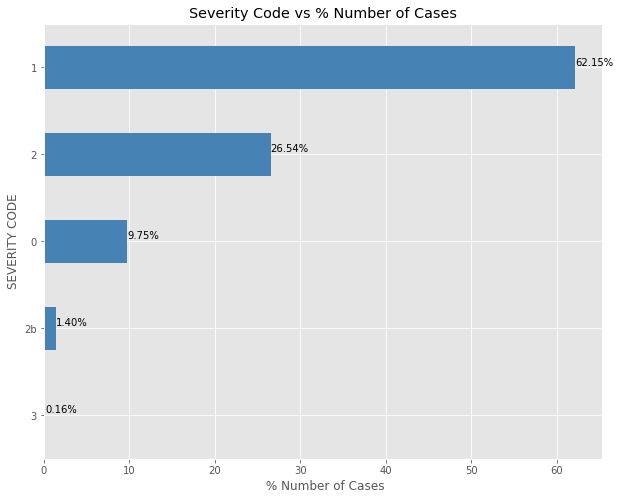

In [6]:
class_data = create_plot_data(df, 'SEVERITYCODE')
plot_and_annotate(class_data, color='steelblue')
plt.ylabel('SEVERITY CODE')
plt.xlabel(' % Number of Cases')
plt.title("Severity Code vs % Number of Cases");

Severity Code classes as follow: <br>
0 - Unknown <br>
1 - Prop Damage <br> 
2 - Injury <br>
2b- Serious Injury<br>
3 - Fatality <br>

From the above plot, we clearly see the dataset is highly imbalance. The Fatility class 3 cases is incredibly low compares to others classes.
***

### Display Attributes Missing Data

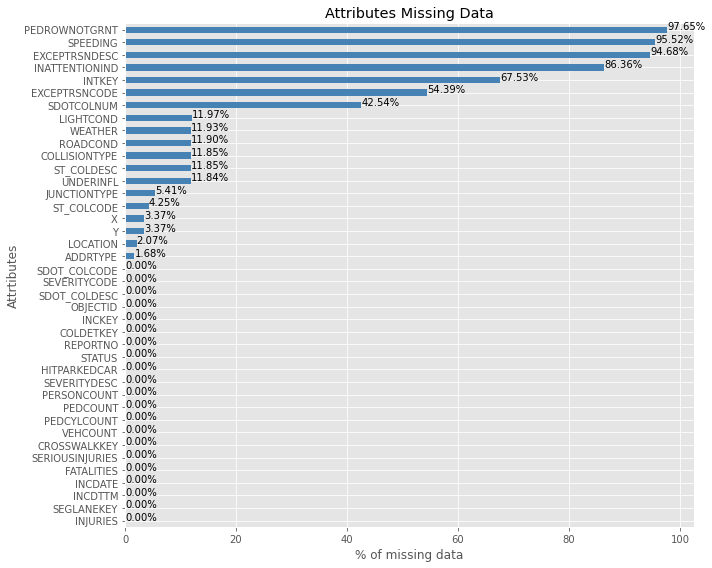

In [7]:
#absent_data= pd.DataFrame(100*df.isnull().sum(axis=0)/df.shape[0],columns=['percent'])
plot_and_annotate(pd.DataFrame(100*df.isnull().sum(axis=0)/df.shape[0], columns=['percent']), color='steelblue')
plt.ylabel("Attrtibutes")
plt.xlabel("% of missing data")
plt.title("Attributes Missing Data");
plt.tight_layout()

Not all attributes is good candidate for independent variables. Non relevant attributes such as **OBJECTID** will be removed as well attributes with high percentage of missing data above 25% such as **SPEEDING, PEDROWNOTGRNT**.
***

## 3. Data Preparation

#### **A. Remove non-relevant and high percentage of missing data.**

Non-relevant features, features that are derived from other features, and features with high missing data will be removed. 

In [8]:
# Non-relevant attributes  and High percentage of missing data
na_rel_attr = ['OBJECTID','COLDETKEY','INCKEY','REPORTNO', 'STATUS', 'INTKEY','EXCEPTRSNCODE', 'EXCEPTRSNDESC',
               'SDOT_COLCODE', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM','SPEEDING','JUNCTIONTYPE',
               'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY','SDOT_COLDESC']


In [9]:
# Drop non relevant attributes
df.drop(na_rel_attr, axis=1, inplace=True)

#### **B. Remove Unknown SEVERITYCODE class 0 and class nan.**

In [10]:
#Let's group the dataframe by severity code and plot each's group vs candidate attributes
severity_grp = df.groupby(['SEVERITYCODE'])

#Total cases for each severity code
for sev_cod in df.SEVERITYCODE.unique():
    print("Severity code (class): {:} with {:}  samples!".format(sev_cod, df.loc[df.SEVERITYCODE == sev_cod].shape[0]))


Severity code (class): 1 with 137596  samples!
Severity code (class): 0 with 21594  samples!
Severity code (class): 2 with 58747  samples!
Severity code (class): 2b with 3102  samples!
Severity code (class): 3 with 349  samples!
Severity code (class): nan with 0  samples!


In [12]:
#Count features with nan in each group
df.drop('SEVERITYCODE',1).isna().groupby(df.SEVERITYCODE, sort=False).sum()

,X,Y,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,
1,4271.0,4271.0,1737.0,2412.0,0.0,3675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3667.0,3814.0,3764.0,3896.0,0.0
0,2066.0,2066.0,1781.0,1893.0,0.0,21592.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21593.0,21592.0,21592.0,21592.0,0.0
2,1072.0,1072.0,191.0,275.0,0.0,912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,957.0,931.0,964.0,0.0
2b,53.0,53.0,3.0,8.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,47.0,42.0,47.0,0.0
3,9.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,0.0


We can see that accident with SEVERITYCODE 0 has a lot of missing data > 90% on several features. Moreover, it is associated with unknown severity. Therefore, we remove this class 0.

In [13]:
#remove class 0
df =df.loc[df.SEVERITYCODE !='0'].copy()

In [14]:
#remove class nan
df.dropna(subset=['SEVERITYCODE'], axis=0, inplace=True)

#Rename severitycode...
# P: Property Damage, M: Minor Injury, S: Serious Injury, F: Fatality
df.SEVERITYCODE.replace(to_replace=['1','2','2b', '3'], value=['P','M','S', 'F'], inplace=True)


#### **C. Dropping nan data accross the rows**

We've dropped features with high percentage of missing data. However, there are several features left that have few missing data. It spans from 0.97-2.71%. We can either impute these missing data with its mean/mode or drop them out. Since we have a lot of samples, i think it should be ok to drop these nan data.

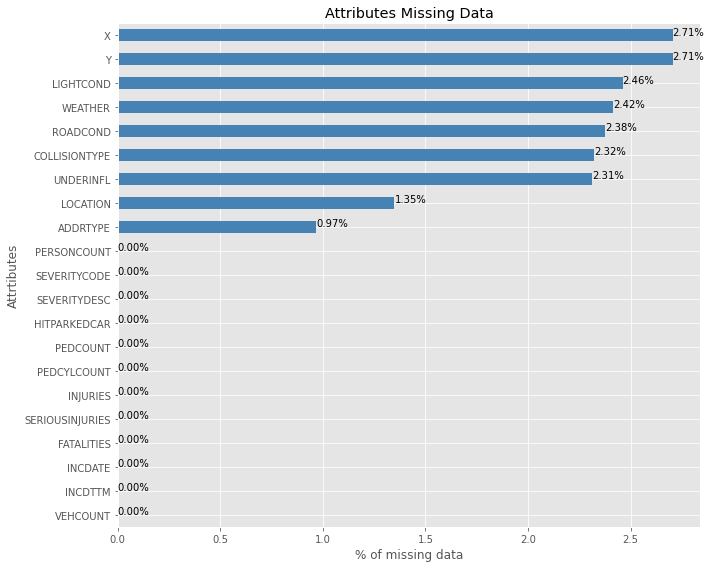

In [15]:
plot_and_annotate(pd.DataFrame(100*df.isnull().sum(axis=0)/df.shape[0], columns=['percent']),color='steelblue')
plt.ylabel("Attrtibutes")
plt.xlabel("% of missing data")
plt.title("Attributes Missing Data");
plt.tight_layout()

In [16]:
#dropping samples with nan
df.dropna(axis=0, how='any', inplace=True)

#### **D. Feature engineering day, month and time and verify its correlation to accident severity.**

In [17]:
# Extract accident date to the name of days
df.loc[:,'DAY'] = pd.to_datetime(df['INCDATE']).dt.day_name().str.slice(stop=3)
df.loc[:,'MONTH'] = pd.to_datetime(df['INCDATE']).dt.month_name().str.slice(stop=3)

#### We'll encode the time as follow:
* 6-12pm : morning
* 12-18pm: afternoon
* 18-24pm: evening
* 0-6am: night


In [18]:
df.loc[:,'INCDTTM'] = pd.to_datetime(df['INCDTTM']).dt.hour 

In [19]:
df.loc[df['INCDTTM'].between(6,12), 'HOUR'] = 'Morning'
df.loc[df['INCDTTM'].between(12,18), 'HOUR'] = 'Afternoon'
df.loc[df['INCDTTM'].between(18,24), 'HOUR'] = 'Evening'
df.loc[df['INCDTTM'].between(0,6), 'HOUR'] = 'Night'

<Figure size 432x288 with 0 Axes>

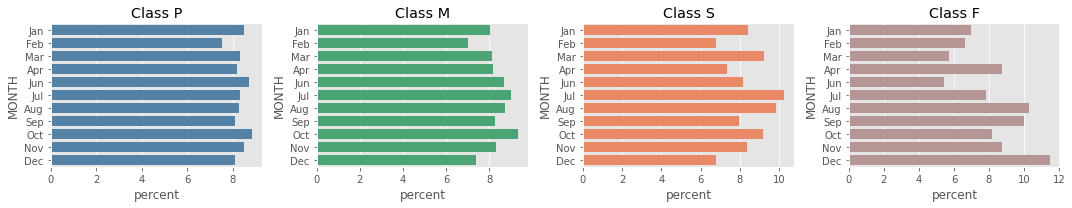

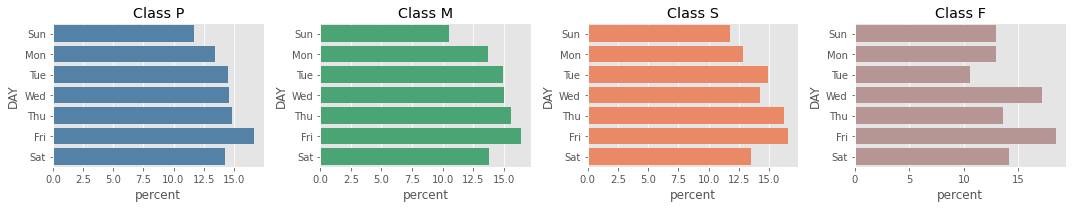

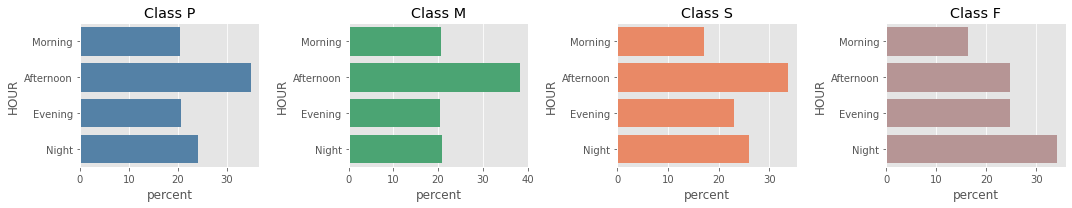

In [20]:
#Plot feature engineering hour, week, month
order = [["Jan", "Feb", "Mar", "Apr", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" ],
         ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
         ["Morning", 'Afternoon', 'Evening', 'Night']]

features = ['MONTH', 'DAY', 'HOUR']
for i, feature in enumerate(features):
    data = create_grp_data(df, feature)
    data = order[i], data[1], data[2]
    plot_grp_data(data, categorical=True)


There is a correlation between day, month and hour of accident happens and its severity. For month feature, October is where most accidents happen for class P and M. For day feature, Friday is when most accident occurs. Most fatality accidents occur at Night.
<br><br>

Overall in general, class P, M, and S has the same pattern all for all. Class F has different pattern.

In [21]:
#Drop INCDATE and INCDTTM attributes
df.drop(['INCDATE', 'INCDTTM'], axis=1, inplace=True)

<br>
<br>


#### **E. Verify the others categorical and numerical features.**
***

**Categorical Feature**

In [22]:
#Rename UNDERINFL and HITPARKEDCAR feature to consistent boolean dtypes
df.UNDERINFL = df.UNDERINFL.replace(to_replace=['0','1'],value=['N','Y'])
df.HITPARKEDCAR = df.HITPARKEDCAR.replace(to_replace=['0','1'],value=['N','Y'])

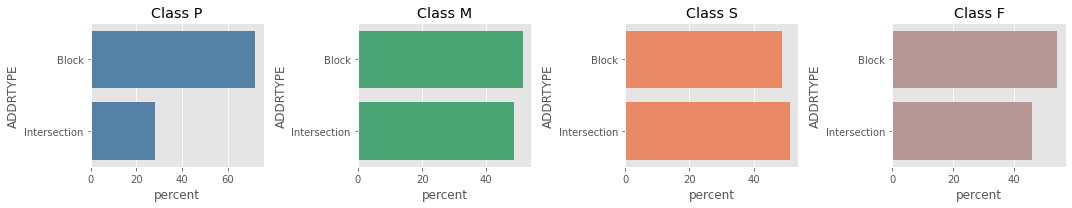

In [23]:
#plot addr type feature
plot_grp_data(create_grp_data(df, 'ADDRTYPE'), categorical=True)

Class P accidents most likely happened in the block.

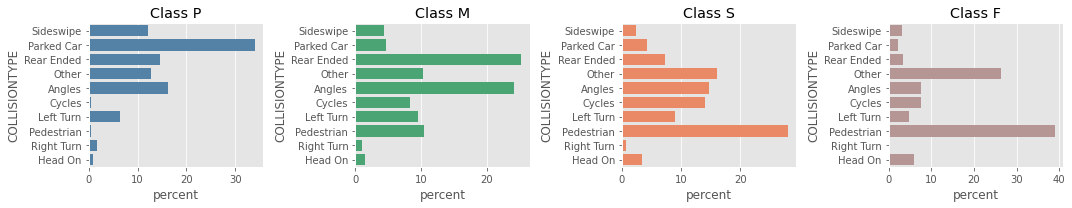

In [24]:
#Plot Collision type feature
plot_grp_data(create_grp_data(df, 'COLLISIONTYPE'), categorical=True)

The trend on every classes are almost the same. Parked car type accident is dominant on Class P.

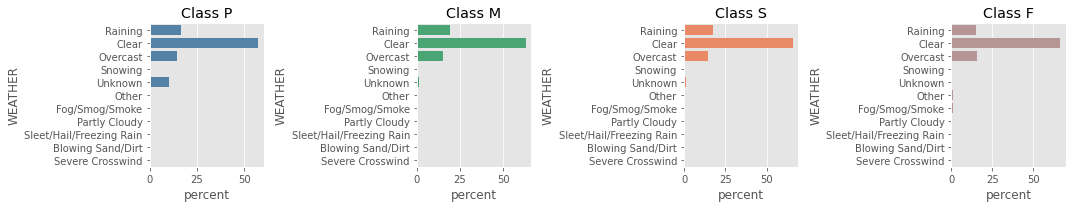

In [25]:
#Plot Weather feature
plot_grp_data(create_grp_data(df, 'WEATHER'), categorical=True)

Most accidents happen on clear day. The pattern is the same for every classes !!

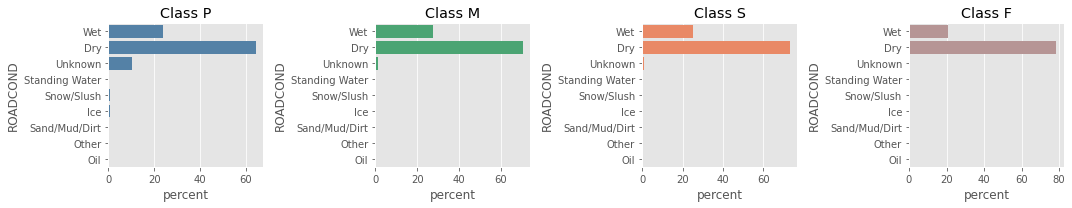

In [26]:
#Plot ROADCOND feature
plot_grp_data(create_grp_data(df, 'ROADCOND'), categorical=True)

Most accidents happen on dry road condition. The pattern is the same for every classes !!

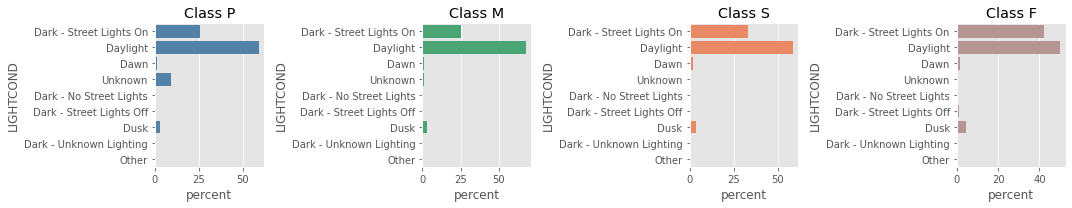

In [27]:
#Plot LIGHTCOND feature
plot_grp_data(create_grp_data(df, 'LIGHTCOND'), categorical=True)

Most accidents happen in daylight The pattern is almost same for every classes !!

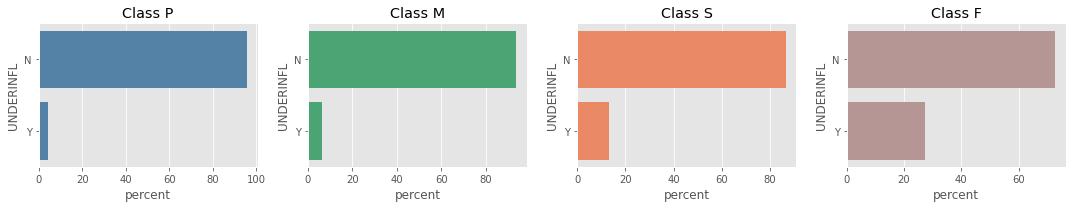

In [28]:
#Plot UNDERINFL feature
plot_grp_data(create_grp_data(df, 'UNDERINFL'), categorical=True)

One third class F accidents is driving under influence.

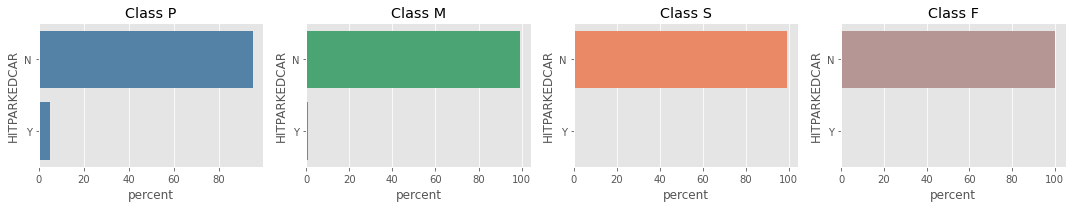

In [29]:
#Plot HITPARKEDCAR feature
plot_grp_data(create_grp_data(df, 'HITPARKEDCAR'), categorical=True)

Pattern is the same for all classes. Few accidents in Class P is related to hitting parked car.!

***
**Numerical Features**

There are a few features whose values are provided after the crash has been reported and processed based on its severity. INJURIES, SERIOUSINJURIES, FATALITIES are those features. They will create data leakage into our target variable. Plus, these features are not available at the time. We will remove them.

In [30]:
#Remove post accident features
df.drop(['INJURIES','SERIOUSINJURIES','FATALITIES'], axis=1, inplace=True)

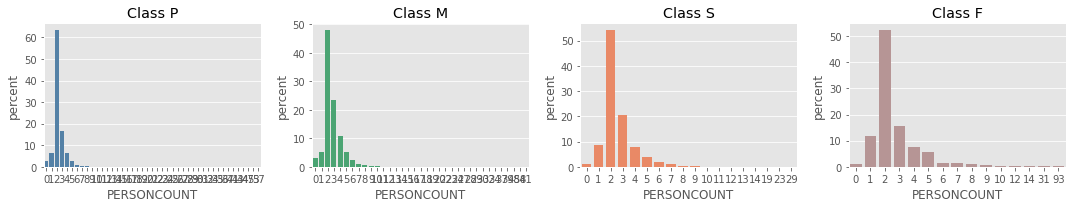

In [31]:
#Plot PERSONCOUNT feature
plot_grp_data(create_grp_data(df, 'PERSONCOUNT'), categorical=False)

Same trend for all classes.

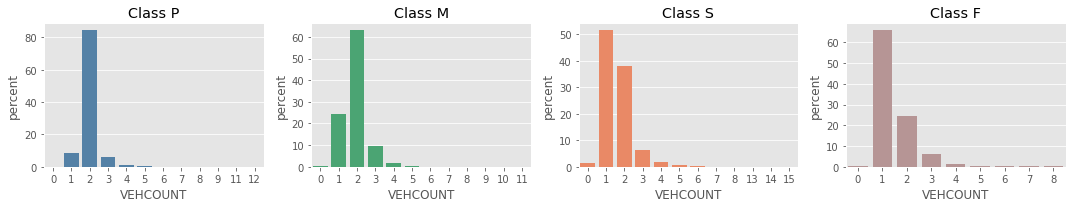

In [32]:
#Plot VEHCOUNT feature
plot_grp_data(create_grp_data(df, 'VEHCOUNT'), categorical=False)

Same trend on every classes.

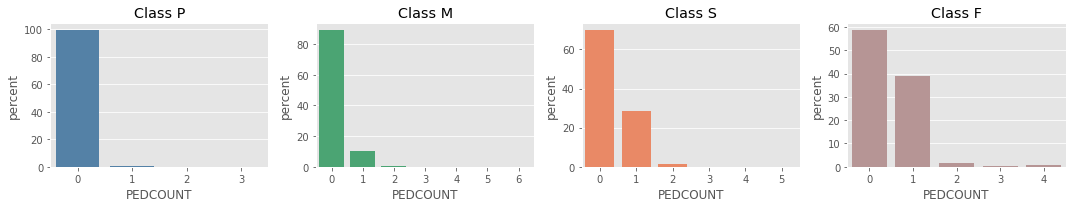

In [33]:
#Plot PEDCOUNT feature
plot_grp_data(create_grp_data(df, 'PEDCOUNT'), categorical=False)

Slightly over 50%  in class F are pedistrian victim!

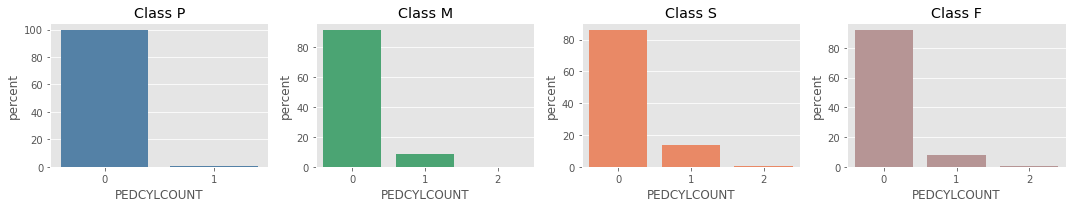

In [34]:
#Plot PEDCYLCOUNT feature
plot_grp_data(create_grp_data(df, 'PEDCYLCOUNT'), categorical=False)

Class M, S and F have the same trend. High chance cyclists are victim in every accidents, especially class F.

#### F. Check Lat and Lon Feature

Convert latitude and longitude into cartesian coordinate.

In [35]:
#This approximation is good enough assuming the earth is sphere.
R = 6371 #radius of earth (km)
lat, lon = np.deg2rad(df.Y), np.deg2rad(df.X)
df['x'] = R*np.cos(lat) * np.cos(lon)
df['y'] = R*np.cos(lat) * np.sin(lon)
df['z'] = R*np.sin(lat)

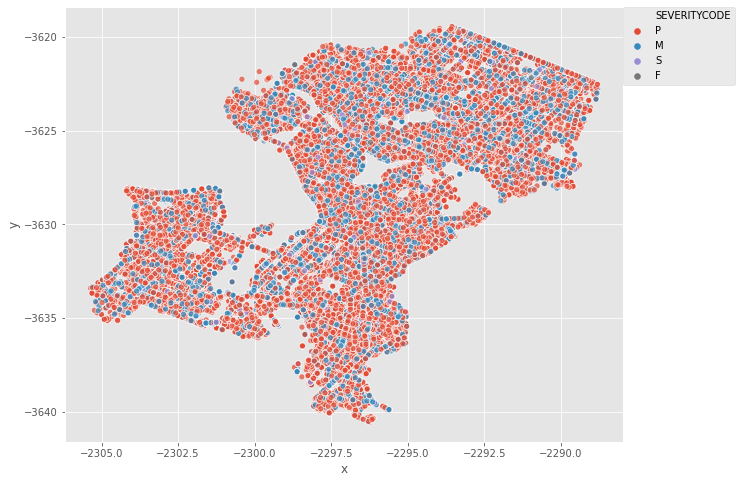

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='x', y='y', data=df, hue='SEVERITYCODE', alpha=0.7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

It is quite difficult to distinguish class M, P, and S.

In [37]:
#Drop X, Y, LOCATION, and SEVERITYDESC attributes
df.drop(['X','Y', 'SEVERITYDESC','LOCATION'], axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189434 entries, 0 to 221388
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ADDRTYPE       189434 non-null  object 
 1   SEVERITYCODE   189434 non-null  object 
 2   COLLISIONTYPE  189434 non-null  object 
 3   PERSONCOUNT    189434 non-null  int64  
 4   PEDCOUNT       189434 non-null  int64  
 5   PEDCYLCOUNT    189434 non-null  int64  
 6   VEHCOUNT       189434 non-null  int64  
 7   UNDERINFL      189434 non-null  object 
 8   WEATHER        189434 non-null  object 
 9   ROADCOND       189434 non-null  object 
 10  LIGHTCOND      189434 non-null  object 
 11  HITPARKEDCAR   189434 non-null  object 
 12  DAY            189434 non-null  object 
 13  MONTH          189434 non-null  object 
 14  HOUR           189434 non-null  object 
 15  x              189434 non-null  float64
 16  y              189434 non-null  float64
 17  z              189434 non-nul

Our dataset now has 17 independent variables before encoding categorical features.

In [39]:
#hot encode categorical features
cat_features =['ADDRTYPE','COLLISIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND',
               'LIGHTCOND', 'HITPARKEDCAR', 'DAY', 'MONTH', 'HOUR',]

df_encode = pd.get_dummies(df, columns=cat_features)

#### **G. Categorical Features Correlation** 

The dataset now has 68 independent categorical variables out of 75 total variables. We are going to determine  whether the categorical variable is dependent or independent of of each other. If independent, then it may be irrelevant to the problem and removed from dataset. We will use the Pearson's chi-squared statistical to test the independence between pairs of categorical variables.

In [40]:
from scipy.stats import chi2_contingency

In [41]:
#Copy X dataframe and leave only categorical features in chi2_df
chi2_df = df_encode.drop(['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'x', 'y', 'z'], axis=1).copy()

In [42]:
#Calculate p-value between two features

features = [feature for feature in  chi2_df.columns]
chi2_contigency_mtx = []
idx = []
for curr_col in features:
    idx.append(curr_col)
    row = []
    for next_col in features:
         contingency = pd.crosstab(chi2_df[curr_col],chi2_df[next_col])
         p_val = chi2_contingency(contingency)[1]
         row.append(p_val)
    chi2_contigency_mtx.append(row)
    
chi2_p_val = pd.DataFrame(chi2_contigency_mtx, columns=idx, index=idx)

<AxesSubplot:>

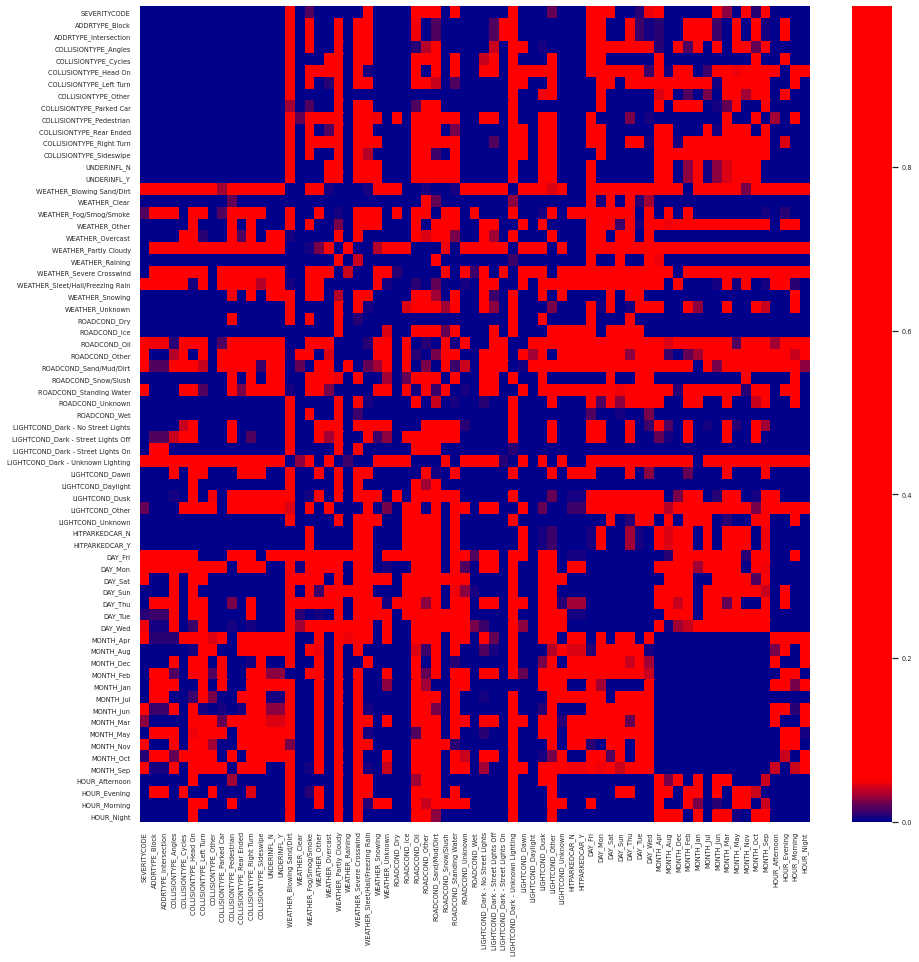

In [43]:
#Plot heat map of chi2_p_val matrix
import matplotlib.colors
norm = matplotlib.colors.Normalize(0,1)
colors=[[norm(0.0),"darkblue"],
        [norm(0.05), "red"],
        [norm(1.0), "red"]]
nmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

plt.figure(figsize=(15,15))
sns.set(font_scale=0.6)
sns.heatmap(chi2_p_val, cmap=nmap)

As we can see from the above map, most of the categorical features is dependent to each other. p-values higher than 0.05 (red color) is considered independent. It appears that the target variable SEVERITYCODE is independent to several features such as LIGHTCOND_DARK, DAY_Fri. But these two features dependent to others features. If we remove these features then we would be removing valueble information to our model.

In [44]:
#df_encode = pd.read_csv('data/clean_data.csv')
#df_encode.drop('Unnamed: 0', axis=1, inplace=True)

#map our clean dataset to general variable name
y = df_encode.SEVERITYCODE
X = df_encode.drop(['SEVERITYCODE'], axis=1).copy()

#save dataframe to csv file
#df_encode.to_csv('data/clean_data.csv')

print("Clean Data Attributes: ",X.shape[1])

Clean Data Attributes:  75


## 4. Methodology

Our clean data is ready to fed into machine learning model. But if we look back the data distribution, our dataset is higly imbalance. This will create bias on the machine learning model. Therefore, I'll implement these techniques:


**Baseline Model** with Resampling
  - Undersample using imblearn NearMiss.
  - Oversample using imblearn SMOTE (Synthetic Minority Over-sampling Technique).

  
**Cost Sensitive Model**
  - Applying weighting configuration during training.

<br>

**Random Forest (RF)** and **Logistic Regression (LR)** are the model I will use. RF is a bagging type ensemble classifier that uses many such single trees to make predictions. It provides higher accuracy through cross validation nad it won't allow over-ftting trees in the models.

LR measures the relationship between the target variable and the one or more independent variables (our features), by estimating probabilities using it’s underlying logistic function such as Sigmoid. It's simple and fast algorithm.

In [62]:
#pip install imblearn
#import necessary util, models, and metrics
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline,make_pipeline


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from joblib import dump, load
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, recall_score, f1_score
import itertools

In [46]:
#Scaling independent variables
column_name = ['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'x','y','z']
X[column_name] = StandardScaler().fit_transform(X[column_name])

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Baseline Models with Resampling

#### Undersampling training set

In [48]:
#define basic models
rfnm = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
lrnm = LogisticRegression(solver='lbfgs', max_iter=1000, n_jobs=-1)

#create a undersampled data version and do train and test split
nm = NearMiss(version=2, n_jobs=-1)
X_nm, y_nm = nm.fit_resample(X_train,y_train)

print("Number of Samples: ",Counter(y_nm))

nm_rf_model = rfnm.fit(X_nm, y_nm)
nm_lr_model = lrnm.fit(X_nm, y_nm)

dump(nm_rf_model, 'models/nm_rf_model.joblib')
dump(nm_lr_model, 'models/nm_lr_model.joblib')

#nm_rf_model=load('models/nm_rf_model.joblib')
#nm_lr_model=load( 'models/nm_lr_model.joblib')

#### Oversampling training set

In [49]:
#define basic models
rfsmt = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
lrsmt = LogisticRegression(solver='lbfgs', max_iter=1000, n_jobs=-1)

#create a oversampled data version
smt = SMOTENC(categorical_features=[7, 74],random_state=21, n_jobs=-1)
X_smt, y_smt = smt.fit_resample(X_train,y_train)

print("Number of Samples: ",Counter(y_smt))

smt_rf_model = rfsmt.fit(X_smt, y_smt)
smt_lr_model = lrsmt.fit(X_smt, y_smt)

dump(smt_rf_model, 'models/smt_rf_model.joblib')
dump(smt_lr_model, 'models/smt_lr_model.joblib')

#smt_rf_model = load('models/smt_rf_model.joblib')
#smt_lr_model = load('models/smt_lr_model.joblib')

#### Cost Sensitive Models

In [50]:
#define models and use 'balanced' as the class weight. This balanced parameter is a heuristic approach.
rf_weighted = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, class_weight='balanced', n_jobs=-1)
lr_weighted = LogisticRegression(solver='lbfgs', max_iter=2000, class_weight='balanced', n_jobs=-1)

#train models
rf_weighted_model = rf_weighted.fit(X_train, y_train)
lr_weighted_model = lr_weighted.fit(X_train, y_train)

#save models into file
dump(rf_weighted_model, 'models/rf_weighted_model.joblib')
dump(lr_weighted_model, 'models/lr_weighted_model.joblib')
#rf_weighted_model=load( 'models/rf_weighted_model.joblib')
#lr_weighted_model=load( 'models/lr_weighted_model.joblib')


## 5. Model Evaluation

#### Performance Metrics

Accuracy is not the best metric when evaluating imbalanced datasets. It is simply the ratio of the correctly predicted classes among all samples. This includes both True Positives and True Negatives.

* Confusion Matrix: a talbe showing correct predictions and types of incorrect predictions.
* Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.
* Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.
* F1: Score: the weighted average of precision and recall.

We will use F1 score as the main metric to evaluate the performance of the different models we will train. To prevent data leakage, all the evaluation is done on test set before resampling.

In [51]:
def create_report(y_test, X_test, model):
    report = classification_report(y_test, model.predict(X_test), labels=['P', 'M', 'S', 'F'], output_dict=True, zero_division=1)
    print(pd.DataFrame(report).round(2).transpose())
    print("\n\n")

<br>



#### Evaluation: Baseline Models with Resampling


In [52]:
#Undersample Data
print("Logistic Regression with undersample data:")
create_report(y_test, X_test, nm_lr_model)

print("RandomForest with undersample data:")
create_report(y_test, X_test, nm_rf_model)

#Oversample Data

print("Logistic Regression with oversample data:")
create_report(y_test, X_test, smt_lr_model)

print("RandomForest with oversample data:")
create_report(y_test, X_test, smt_rf_model)

Logistic Regression with undersample data:
              precision  recall  f1-score   support
P                  0.57    0.04      0.08  32270.00
M                  0.52    0.03      0.06  14247.00
S                  0.09    0.07      0.08    768.00
F                  0.00    0.65      0.00     74.00
accuracy           0.04    0.04      0.04      0.04
macro avg          0.30    0.20      0.06  47359.00
weighted avg       0.54    0.04      0.07  47359.00



RandomForest with undersample data:
              precision  recall  f1-score   support
P                  0.10    0.00      0.00  32270.00
M                  0.79    0.01      0.02  14247.00
S                  0.10    0.04      0.06    768.00
F                  0.00    0.78      0.00     74.00
accuracy           0.01    0.01      0.01      0.01
macro avg          0.25    0.21      0.02  47359.00
weighted avg       0.31    0.01      0.01  47359.00



Logistic Regression with oversample data:
              precision  recall  f1-score

#### Evaluation: Cost Sensitive Models

In [54]:
print("Logistic Regression Cost Sensitive:")
create_report(y_test, X_test, lr_weighted_model)

print("RandomForest Cost Sensitive:")
create_report(y_test, X_test, rf_weighted_model)

Logistic Regression Cost Sensitive:
              precision  recall  f1-score   support
P                  0.90    0.54      0.67  32270.00
M                  0.41    0.53      0.46  14247.00
S                  0.05    0.31      0.08    768.00
F                  0.01    0.53      0.02     74.00
accuracy           0.53    0.53      0.53      0.53
macro avg          0.34    0.48      0.31  47359.00
weighted avg       0.73    0.53      0.60  47359.00



RandomForest Cost Sensitive:
              precision  recall  f1-score   support
P                  0.86    0.64      0.73  32270.00
M                  0.46    0.71      0.56  14247.00
S                  0.08    0.15      0.10    768.00
F                  0.01    0.01      0.01     74.00
accuracy           0.65    0.65      0.65      0.65
macro avg          0.35    0.38      0.35  47359.00
weighted avg       0.73    0.65      0.67  47359.00





***

### **<center>Model Summary and Metrics</center>**

|No   |Model                             |Accuracy  |Precision|Recall|f1-score|
|:---:|----------------------------------|:--------:|:-------:|:----:|:------:|
|1    |Logistic Regression - undersample | 0.04     |0.54     |0.04  | 0.07   |
|2    |RandomForest - undersample        | 0.01     |0.31     |0.01  | 0.01   |
|3    |Logistic Regression - oversample  | 0.73     |0.70     |0.73  | 0.71   |
|4    |RandomForest - oversample         | 0.65     |0.72     |0.65  | 0.67   |
|5    |Logistic Regression - weighted    | 0.53     |0.73     |0.48  | 0.53   |
|6    |RandomForest - Weighted           | 0.65     |0.73     |0.65  | 0.67   |

<p><center> The metric table above it seems that Logistic Regression - oversample is the winner. But if we look on the report, it fails to predict class F. </center></p>
<p><center> The clear winner is RandomForest - Oversample. Now let's see if we can improve this model </center></p>
    
***

### Cross Validation - Winner Model

On previous model, oversampling was done only one time over minority classes. We need to do cross validation on our model to verify its consistency. First we split the dataset into training and validation folds, oversampling, train classifier on training folds and then finally validate the classifier on remaining fold. of our model can improve this by spliting dataset using StratifiedKfold, resampling, and do GridSearch.

In [55]:
#1. define folds, 4 splits would approximately the same size as test set
ks = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)

#2. define models
rfsmote = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=2)
smt = SMOTENC(categorical_features=[7, 74],random_state=21, n_jobs=2)
smt_pipeline = make_pipeline(smt, rfsmote)

#3. cross validation, f1 score is used as main metric
score = cross_val_score(smt_pipeline, X_train, y_train, scoring='f1_weighted', cv=ks, n_jobs=-1)
print('f1-score over 4 folds train and validation: ', score)

f1-score over 4 folds train and validation:  [0.67541115 0.67649873 0.67418854 0.67311761]


Our model is consistent with f1-score around 0.67

### RandomSearchCV - Hyperparameter Tuning Winner Model

In [56]:
#1. define folds, 4 splits would approximately the same size as test set
ks = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)

#2. define models, oversampling
rfsmote = RandomForestClassifier(random_state=42)
smt = SMOTENC(categorical_features=[7, 74],random_state=21)
smt_pipeline = make_pipeline(smt, rfsmote)

#3. define parameters for RandomForest
rf_param = { 'criterion':['gini','entropy'],
             'n_estimators': [100, 150, 200],
             'max_depth': [10, 15, 20],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10]
           }
new_params = {'randomforestclassifier__' + key: rf_param[key] for key in rf_param}    

In [58]:
#4. Parameter Tuning
grid_smte = RandomizedSearchCV(smt_pipeline, param_distributions=new_params, n_iter=100,cv=ks,
                              # scoring='f1_weighted', return_train_score=True, verbose=2, n_jobs=4)
grid_ser = grid_smte.fit(X, y)
dump(grid_ser,'models/grid_ser.joblib')
#grid_ser = load('models/grid_ser.joblib')

In [59]:
grid_ser.best_params_

{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__criterion': 'entropy'}

In [60]:
create_report(y_test, X_test, grid_ser)

              precision  recall  f1-score   support
P                  0.93    0.81      0.86  32270.00
M                  0.66    0.84      0.74  14247.00
S                  0.58    0.69      0.63    768.00
F                  0.23    0.74      0.35     74.00
accuracy           0.82    0.82      0.82      0.82
macro avg          0.60    0.77      0.65  47359.00
weighted avg       0.84    0.82      0.82  47359.00





<Figure size 640x480 with 0 Axes>

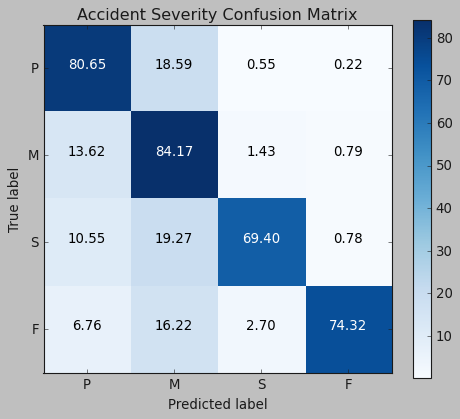

In [68]:
%run -i lib_utils
plot_cm(y_test, grid_ser.predict(X_test))